In [1]:
%load_ext rpy2.ipython
from IPython.display import FileLink

In [2]:
%%R

#library(ggplot2)
#library(rwantshue)
#library(grid); library(gridExtra)
#library(magrittr)
library(phyloseq)
#library(compositions)
#library(scales)
library(ampvis)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: ggplot2

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: ggrepel

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: reshape2

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: grid

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: vegan

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: 

In [3]:
%%R
workDir = '/home/chantal/Chazy/data/'
figDir = '/home/chantal/Chazy/Bulk/ITS/data/figs/'

physeqDir = '/home/chantal/Chazy/data/phyloseq/ITS/'
physeqBulk = 'bulk-core'


nprocs = 20

In [4]:
%%R
gm_mean = function(x, na.rm=TRUE){
  # The geometric mean, with some error-protection bits.
  exp(sum(log(x[x > 0 & !is.na(x)]), na.rm=na.rm) / length(x))
}

clr = function(x, base=2){
  x <- log((x / gm_mean(x)), base)
  x[!is.finite(x) | is.na(x)] <- 0.0
  return(x)
}

F = file.path(physeqDir, physeqBulk)
physeq.Bulk = readRDS(F)
physeq.Bulk.m = physeq.Bulk %>% sample_data
physeq.Bulk = physeq.Bulk %>% filter_taxa(function(x) sum(x) > 0, TRUE)
#physeq.Bulk.Sparsity = filter_taxa(physeq.Bulk, function(x) sum(x > 0) > (0.25 * length(x)), TRUE)

physeq.Bulk.m = physeq.Bulk %>% sample_data

physeq.Bulk.core = prune_samples(physeq.Bulk.m$Land_Management != "PAS",
                           physeq.Bulk)
    
physeq.Bulk.m = physeq.Bulk.core %>% sample_data

physeq.Bulk.m
 
physeq.Bulk.core.norm = physeq.Bulk.core %>% transform_sample_counts(function(x) x/sum(x))
    
physeqCLR = transform_sample_counts(physeq.Bulk.core, fun = clr)

    
#print(physeq.Bulk.Sparsity)
print(physeq.Bulk.core)
print(physeqCLR)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2341 taxa and 176 samples ]
sample_data() Sample Data:       [ 176 samples by 24 sample variables ]
tax_table()   Taxonomy Table:    [ 2341 taxa by 7 taxonomic ranks ]
phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2341 taxa and 176 samples ]
sample_data() Sample Data:       [ 176 samples by 24 sample variables ]
tax_table()   Taxonomy Table:    [ 2341 taxa by 7 taxonomic ranks ]


In [5]:
%%R
mdf = psmelt(physeqCLR)

In [6]:
%%R
head(mdf)
write.csv(mdf, 'Fungal_mdf_CLRtransform.csv')

In [7]:
%%R
summary(mdf$Abundance)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.4346  0.0000  0.0000  0.2109  0.0000 12.7000 


In [8]:
%%R
bulk.df = mdf #%>%
    #group_by(Sample) %>%
    #mutate(clr.ab = clr_ab/ sum(clr_ab)) #%>%
    #group_by(OTU, Rank2, Rank3, Rank4, Sample_Date) %>%
    #summarize(`Relative Abundance` = mean(clr.ab)) 

#head(bulk.df) %>% as.data.frame

In [9]:
%%R
head(bulk.df)

          OTU          Sample Abundance     Full.sample Fraction PrimerF
137945 OTU.26 Sept.NTH.1.2015  12.70363 Sept.NTH.1.2015       NA  nBITSf
186853 OTU.34    July14.PTR.4  12.22244    July14.PTR.4       NA  nBITSf
408159 OTU.96       Oct.NTH.3  12.20634       Oct.NTH.3       NA  nBITSf
384704 OTU.81  Aug.NTH.1.2015  11.78592  Aug.NTH.1.2015       NA  nBITSf
166199  OTU.3       Nov.PTR.2  11.76664       Nov.PTR.2       NA  nBITSf
384596 OTU.81  Aug.NTH.2.2015  11.71741  Aug.NTH.2.2015       NA  nBITSf
       PrimerR Barcode Rev.index Fwd.index Treatment Day Pool     Experiment
137945   58A2r     136  gatctacg  gacaccgt       NTH  NA    5 Chazy.ITS.Bulk
186853   58A2r      70  actacgac  cgtgagtg       PTR  NA    4 Chazy.ITS.Bulk
408159   58A2r     106  cgaagtat  actatctg       NTH  NA    4 Chazy.ITS.Bulk
384704   58A2r     119  tagcagct  ggatatct       NTH  NA    5 Chazy.ITS.Bulk
166199   58A2r     134  gatctacg  cgtgagtg       PTR  NA    4 Chazy.ITS.Bulk
384596   58A2r     123  tct

In [10]:
%%R
bulk.df$Sample_Date = as.POSIXct(strptime(bulk.df$Sample_Date, format = "%m/%d/%Y"))
str(bulk.df$Sample_Date)

 POSIXct[1:412016], format: "15-09-23" "14-07-10" "14-10-29" "15-08-13" "14-11-26" ...


In [11]:
%%R
summary(bulk.df$Abundance)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.4346  0.0000  0.0000  0.2109  0.0000 12.7000 


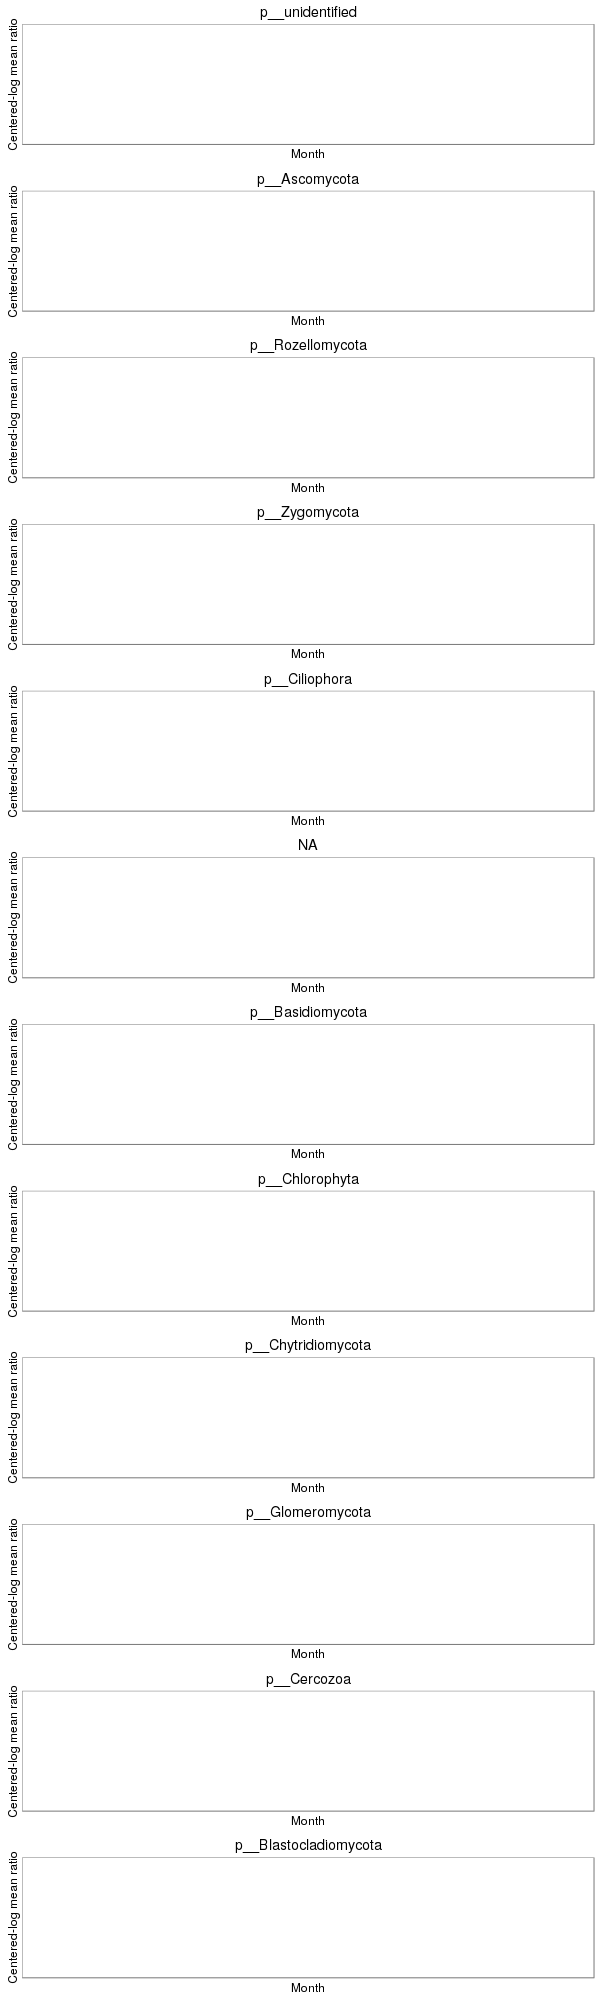

In [12]:
%%R -w 600 -h 2000

#scheme = iwanthue()

phyla = unique(bulk.df$Rank2)
#t = "13CCPS"
bulk.df$Rank2 = gsub("p__", "", bulk.df$Rank2)

d = filter(bulk.df, !(is.na(Abundance)))
d = filter(d, !(is.na(Rank2)))

plot = function(r, d) {
    plot.d = d %>% filter(Rank2 == r)
    #colors = scheme$hex(length(unique(plot.d$OTU)), color_space = hcl_presets$intense)

    p = ggplot(plot.d, aes(x = (Sample_Date), y = Abundance, fill = Rank4))

    p = p + geom_bar(stat = "identity")
    
    p = p + labs(x = "Month", y = 'Centered-log mean ratio')

    #p = p + scale_fill_manual(values = colors)
    
    p = p + guides(fill = FALSE)
    
    p = p + theme_bw()
    
    p = p + theme(axis.text = element_text(size = 12),
                  legend.key.height = unit(0.65, "lines"),
                  legend.key.width = unit(0.65, "lines"),
                  legend.text = element_text(size = 9),
                  axis.text.x  = element_text(angle=90, vjust=0.5, size=16)) +
    scale_x_datetime(breaks = date_breaks("1 month"), labels=date_format("%b, %Y"))
    
    p = p + ggtitle(r)

    p}
    
plots.13CCPS = lapply(phyla, plot, d = d)

do.call(grid.arrange, c(plots.13CCPS,list(ncol=1)))

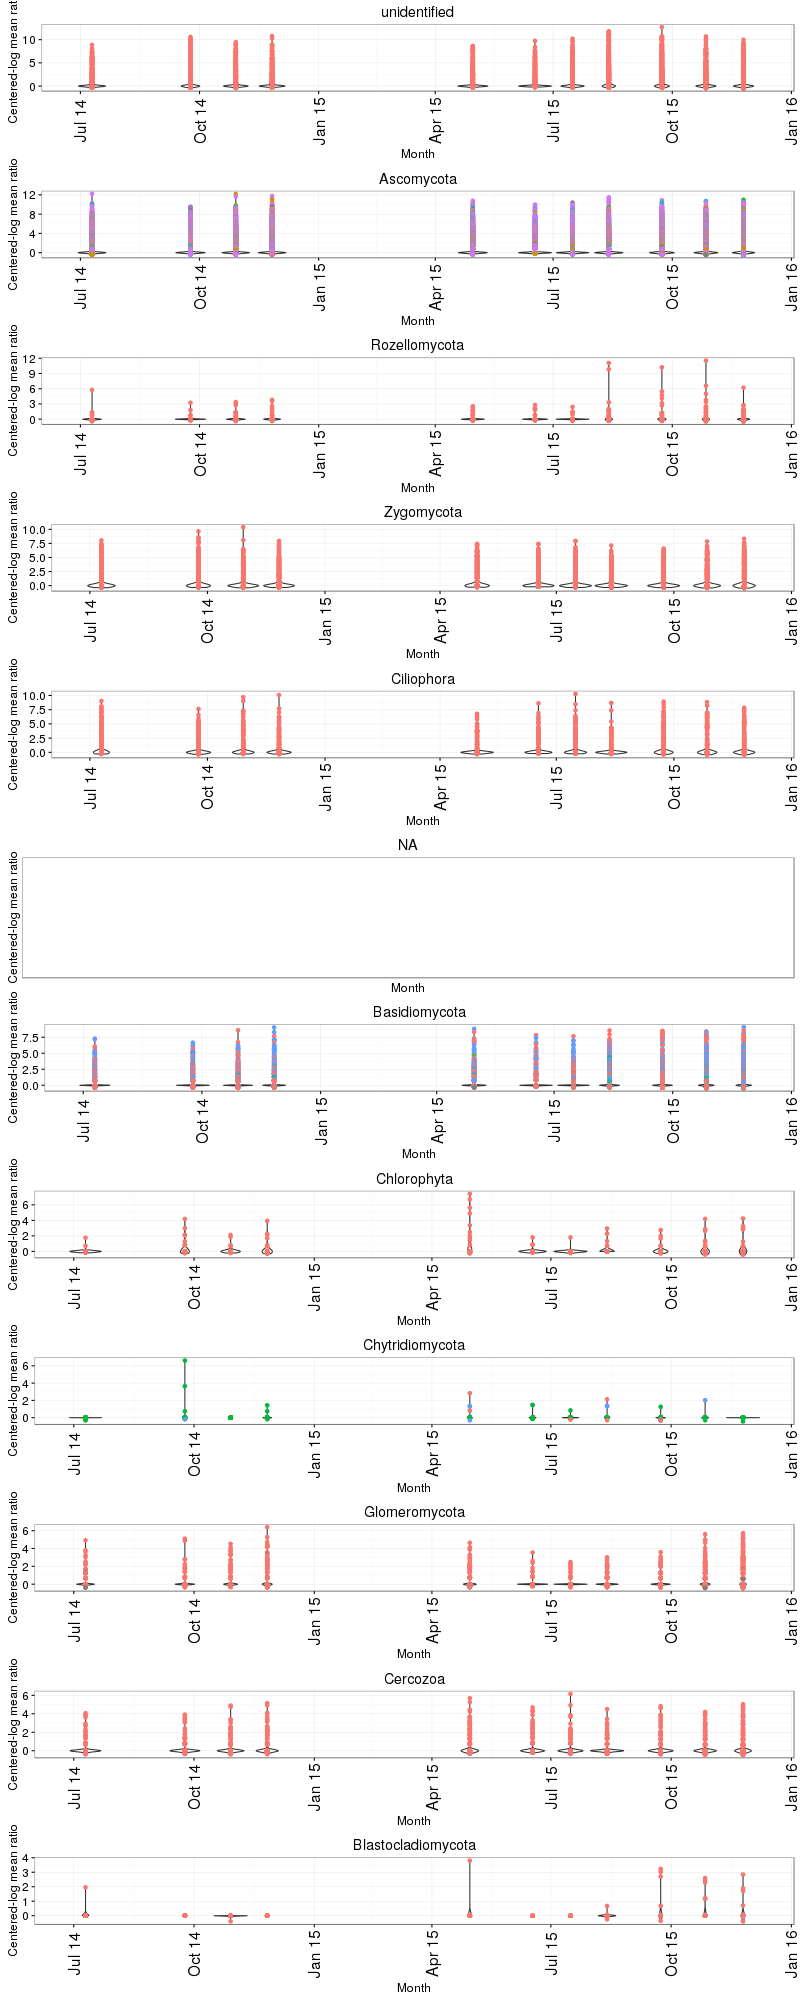

In [13]:
%%R -w 800 -h 2000

#scheme = iwanthue()

phyla = unique(bulk.df$Rank2)
#t = "13CCPS"
bulk.df$Rank2 = gsub("p__", "", bulk.df$Rank2)

d = filter(bulk.df, !(is.na(Abundance)))
d = filter(d, !(is.na(Rank2)))

plot = function(r, d) {
    plot.d = d %>% filter(Rank2 == r)
    #colors = scheme$hex(length(unique(plot.d$OTU)), color_space = hcl_presets$intense)

    p = ggplot(plot.d)

    p = p  + geom_violin(aes(x = (Sample_Date), yname = Abundance, group = Sample_Date)) + 
    geom_jitter(aes(x = Sample_Date, y = Abundance, color = Rank3), height = 0, width = 0.2)
    
    
    p = p + labs(x = "Month", y = 'Centered-log mean ratio')

    #p = p + scale_fill_manual(values = colors)
    
    p = p + guides(fill = FALSE, color = FALSE)
    
    p = p + theme_bw()
    
    p = p + theme(axis.text = element_text(size = 12),
                  legend.key.height = unit(0.65, "lines"),
                  legend.key.width = unit(0.65, "lines"),
                  legend.text = element_text(size = 9),
                  axis.text.x  = element_text(angle=90, vjust=0.5, size=16)) #+
   # scale_x_datetime(breaks = date_breaks("1 month"), labels=date_format("%b, %Y"))
    
    p = p + ggtitle(r)

    p}
    
plots.13CCPS = lapply(phyla, plot, d = d)

do.call(grid.arrange, c(plots.13CCPS,list(ncol=1)))

In [14]:
%%R
head(d)

     OTU          Sample Abundance     Full.sample Fraction PrimerF PrimerR
1 OTU.26 Sept.NTH.1.2015  12.70363 Sept.NTH.1.2015       NA  nBITSf   58A2r
2 OTU.34    July14.PTR.4  12.22244    July14.PTR.4       NA  nBITSf   58A2r
3 OTU.96       Oct.NTH.3  12.20634       Oct.NTH.3       NA  nBITSf   58A2r
4 OTU.81  Aug.NTH.1.2015  11.78592  Aug.NTH.1.2015       NA  nBITSf   58A2r
5  OTU.3       Nov.PTR.2  11.76664       Nov.PTR.2       NA  nBITSf   58A2r
6 OTU.81  Aug.NTH.2.2015  11.71741  Aug.NTH.2.2015       NA  nBITSf   58A2r
  Barcode Rev.index Fwd.index Treatment Day Pool     Experiment Gradient
1     136  gatctacg  gacaccgt       NTH  NA    5 Chazy.ITS.Bulk     <NA>
2      70  actacgac  cgtgagtg       PTR  NA    4 Chazy.ITS.Bulk     <NA>
3     106  cgaagtat  actatctg       NTH  NA    4 Chazy.ITS.Bulk     <NA>
4     119  tagcagct  ggatatct       NTH  NA    5 Chazy.ITS.Bulk     <NA>
5     134  gatctacg  cgtgagtg       PTR  NA    4 Chazy.ITS.Bulk     <NA>
6     123  tctctatg  tagcgagt 

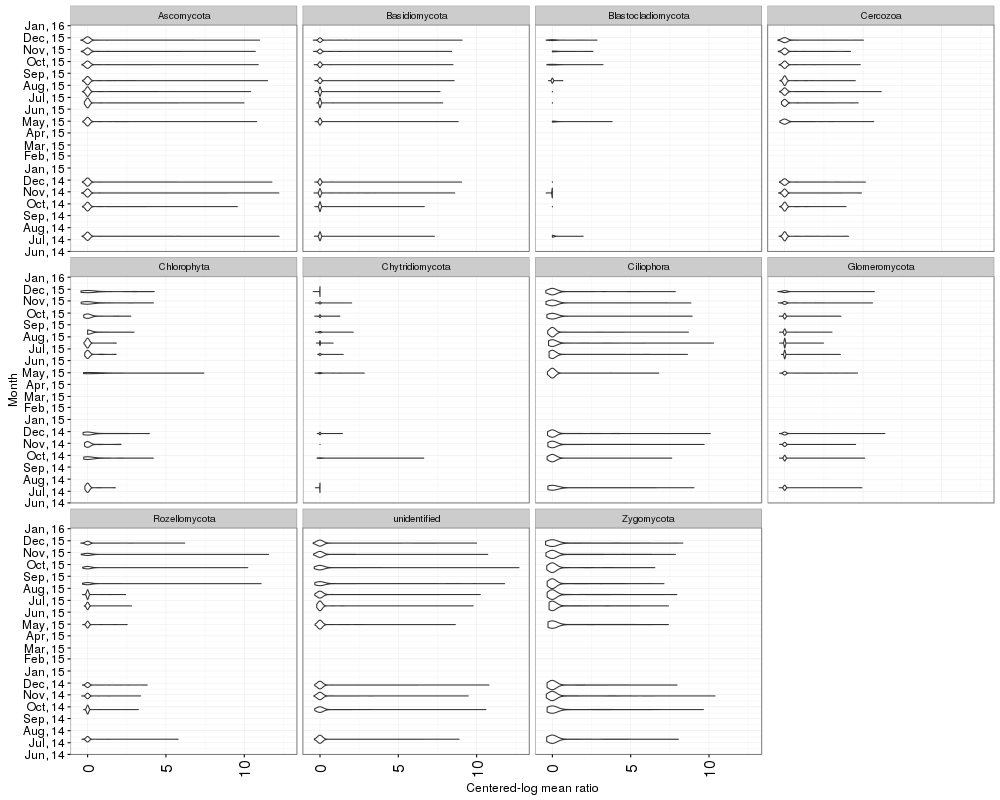

In [15]:
%%R -w 1000 -h 800

#scheme = iwanthue()

phyla = unique(bulk.df$Rank2)
#t = "13CCPS"
bulk.df$Rank2 = gsub("p__", "", bulk.df$Rank2)

d = filter(bulk.df, !(is.na(Abundance)))
d = filter(d, !(is.na(Rank2)))

    p = ggplot(d)

    p = p + geom_violin(aes(x = (Sample_Date), yname = Abundance, group = Sample_Date)) + facet_wrap(~Rank2) +
    coord_flip()
    
    p = p + labs(x = "Month", y = 'Centered-log mean ratio')

    #p = p + scale_fill_manual(values = colors)
    
    p = p + guides(fill = FALSE)
    
    p = p + theme_bw()
    
    p = p + theme(axis.text = element_text(size = 12),
                  legend.key.height = unit(0.65, "lines"),
                  legend.key.width = unit(0.65, "lines"),
                  legend.text = element_text(size = 9),
                  axis.text.x  = element_text(angle=90, vjust=0.5, size=16)) +
    scale_x_datetime(breaks = date_breaks("1 month"), labels=date_format("%b, %Y"))

    p

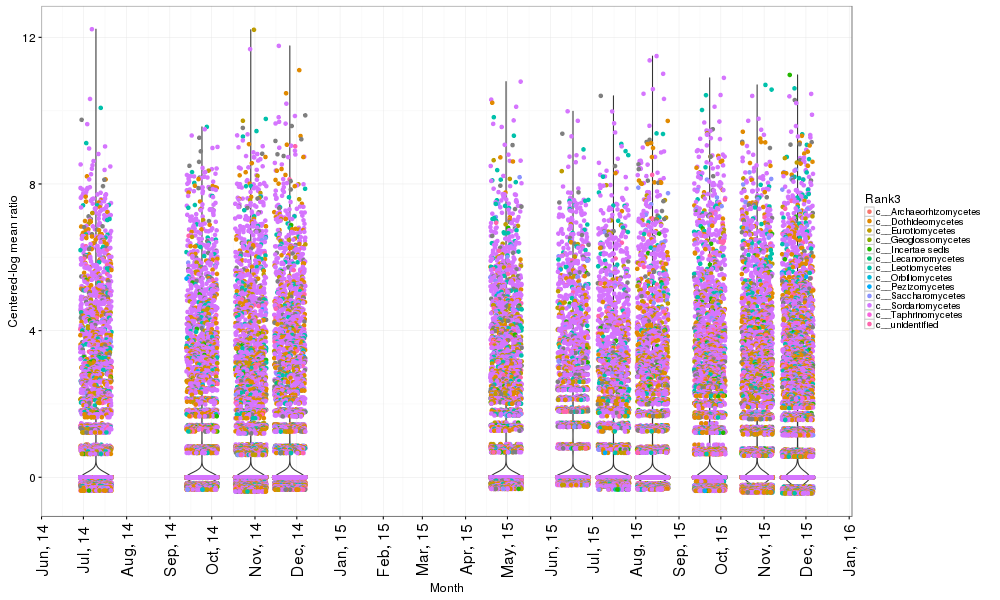

In [16]:
%%R -w 1000 -h 600

#scheme = iwanthue()

phyla = unique(bulk.df$Rank2)
#t = "13CCPS"
bulk.df$Rank2 = gsub("p__", "", bulk.df$Rank2)

d = filter(bulk.df, !(is.na(Abundance)))
d = filter(d, Rank2 == 'Ascomycota')

    p = ggplot(d)

    p = p + geom_violin(aes(x = (Sample_Date), yname = Abundance, group = Sample_Date)) + 
    geom_jitter(aes(x = Sample_Date, y= Abundance, color = Rank3)) 
    
    p = p + labs(x = "Month", y = 'Centered-log mean ratio')

    #p = p + scale_fill_manual(values = colors)
    
    p = p + guides(fill = FALSE)
    
    p = p + theme_bw()
    
    p = p + theme(axis.text = element_text(size = 12),
                  legend.key.height = unit(0.65, "lines"),
                  legend.key.width = unit(0.65, "lines"),
                  legend.text = element_text(size = 9),
                  axis.text.x  = element_text(angle=90, vjust=0.5, size=16)) +
    scale_x_datetime(breaks = date_breaks("1 month"), labels=date_format("%b, %Y"))

    p

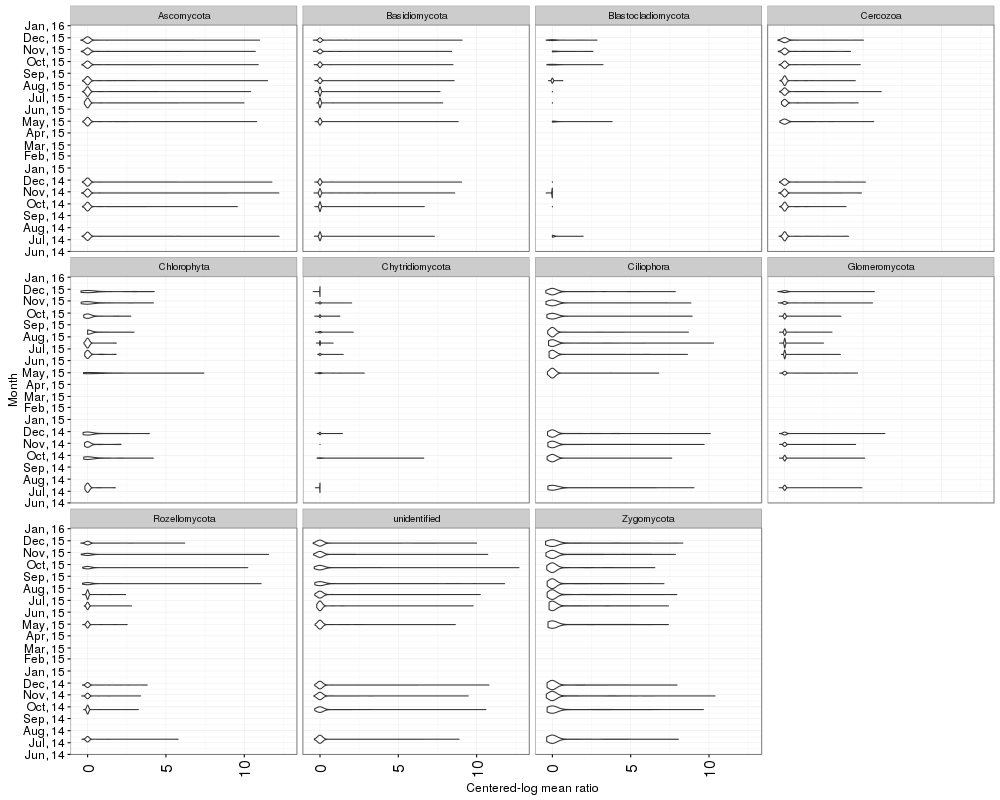

In [17]:
%%R -w 1000 -h 800

#scheme = iwanthue()

phyla = unique(bulk.df$Rank2)
#t = "13CCPS"
bulk.df$Rank2 = gsub("p__", "", bulk.df$Rank2)

d = filter(bulk.df, !(is.na(Abundance)))
d = filter(d, !(is.na(Rank2)))

    p = ggplot(d)

    p = p + geom_violin(aes(x = (Sample_Date), yname = Abundance, group = Sample_Date)) + facet_wrap(~Rank2) +
    coord_flip()
    
    p = p + labs(x = "Month", y = 'Centered-log mean ratio')

    #p = p + scale_fill_manual(values = colors)
    
    p = p + guides(fill = FALSE)
    
    p = p + theme_bw()
    
    p = p + theme(axis.text = element_text(size = 12),
                  legend.key.height = unit(0.65, "lines"),
                  legend.key.width = unit(0.65, "lines"),
                  legend.text = element_text(size = 9),
                  axis.text.x  = element_text(angle=90, vjust=0.5, size=16)) +
    scale_x_datetime(breaks = date_breaks("1 month"), labels=date_format("%b, %Y"))

    p

In [18]:
%%R
pdf("../data/figs/abund_v_time_phyla.pdf", h = 15, w = 10)
do.call(grid.arrange, c(plots.13CCPS, list(ncol=1, nrow = 7)))
dev.off()



Error in pdf("../data/figs/abund_v_time_phyla.pdf", h = 15, w = 10) : 
  cannot open file '../data/figs/abund_v_time_phyla.pdf'


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in pdf("../data/figs/abund_v_time_phyla.pdf", h = 15, w = 10) : 
  cannot open file '../data/figs/abund_v_time_phyla.pdf'

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: In addition: 
  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: There were 13 warnings (use warnings() to see them)
  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [19]:
%%R -w 400 -h 800

#scheme = iwanthue()

phyla = c("Sordariomycetes", "Agaricomycetes", "Dothideomycetes", 
          "Leotiomycetes", "Orbiliomycetes", "Saccharomycetes", "unidentified")
#t = "13CCPS"
bulk.df$Rank3 = gsub("c__", "", bulk.df$Rank3)

filt = minP.df %>% 
    filter(Rank3 %in% phyla)# %>%
    #arrange(Rank3, `Relative Abundance`)

d = filter(bulk.df, OTU %in% filt$OTU)#, 'Relative Abundance' > 0)


    p = ggplot(d, aes(x = Rank3, y = `Relative Abundance`, fill = OTU))

    p = p + geom_bar(stat = "identity")
    
    p = p + labs(x = "Class", y = "Rel. Abundance")

    #p = p + scale_fill_manual(values = colors)
    
    p = p + guides(fill = guide_legend(ncol = 2))
    
    p = p + theme_bw()
    
    p = p + theme(axis.text = element_text(size = 12, angle = 90),
                  legend.key.height = unit(0.65, "lines"),
                  legend.key.width = unit(0.65, "lines"),
                  legend.text = element_text(size = 9))
    
   # p = p + ggtitle(substitute(paste(italic(b), sep = ""), 
    #                           list(a = t, b = r)))

    p


Error in eval(expr, envir, enclos) : object 'minP.df' not found


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in eval(expr, envir, enclos) : object 'minP.df' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [20]:
%%R
d %>% group_by(Rank3) %>% summarise(totalRA = sum(`Relative Abundance`))


Error in eval(expr, envir, enclos) : 
  object 'Relative Abundance' not found


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in eval(expr, envir, enclos) : 
  object 'Relative Abundance' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [21]:
FileLink("figs/abund_v_time_phyla.pdf")


/home/chantal/Chazy/Bulk/ITS/figs/abund_v_time_phyla.pdf

In [22]:
 %%R -w 1200 -h 1000
    
    d2= filter(d, `Relative Abundance` > 0)
    
    p = ggplot(d2, aes(x = factor(Day), y = `Relative Abundance`, fill = Rank3))

    p = p + geom_bar(stat = "identity")
    
    p = p + labs(x = "Day", y = "Rel. Abundance")

    #p = p + scale_fill_manual(values = colors)
    
    p = p + guides(fill = guide_legend(ncol = 2))
    
    p = p + theme_bw()
    
    p = p + theme(axis.text = element_text(size = 12),
                  legend.key.height = unit(0.65, "lines"),
                  legend.key.width = unit(0.65, "lines"),
                  legend.text = element_text(size = 9))
    
  #  p = p + ggtitle(substitute(paste(italic(b), sep = ""), 
   #                            list(a = t, b = r)))
    
    p = p + facet_wrap(~OTU, scales = "free_y")

    p


Error in eval(expr, envir, enclos) : 
  object 'Relative Abundance' not found


In [23]:
%%R 
unique(physeq.Bulk.m$Sample_Date)

 [1] 4/30/15  8/13/15  7/16/15  11/26/14 6/17/15  9/24/14  7/10/14  11/25/15
 [9] 10/27/15 10/29/14 9/23/15 
11 Levels: 10/27/15 10/29/14 11/25/15 11/26/14 4/30/15 6/17/15 ... 9/24/14


In [24]:
%%R
sample_data(physeq.Bulk.core)$Sample_Date = factor(sample_data(physeq.Bulk.core)$Sample_Date, 
                                        levels = c('7/10/14', '9/24/14', '10/29/14', '11/26/14', 
                                                  '4/30/15', '6/17/15', '7/16/15', '8/13/15', 
                                                  '9/23/15', '10/27/15', '11/25/15'))

## Heatmap

In [25]:
%%R
sample_data(physeq.Bulk.core.norm)$Sample_Date = factor(sample_data(physeq.Bulk.core.norm)$Sample_Date, 
                                        levels = c('7/10/14', '9/24/14', '10/29/14', '11/26/14', 
                                                  '4/30/15', '6/17/15', '7/16/15', '8/13/15', 
                                                  '9/23/15', '10/27/15', '11/25/15'))

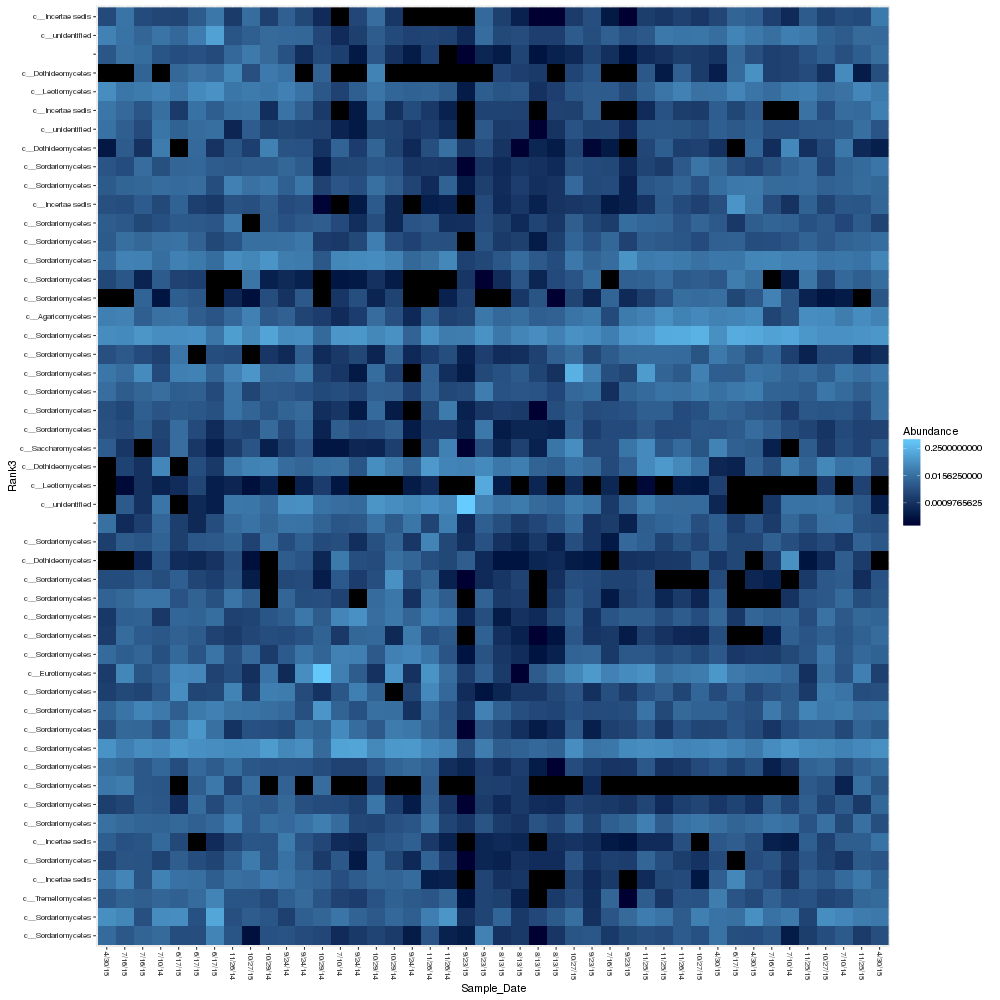

In [26]:
%%R -w 1000 -h 1000
physeq.m = sample_data(physeq.Bulk.core.norm)

gpt = prune_samples(physeq.Bulk.m$Land_Management == 'NTH', physeq.Bulk.core.norm)
gpt <- subset_taxa(gpt, Rank1 =="k__Fungi") 
gpt <- prune_taxa(names(sort(taxa_sums(gpt),TRUE)[1:50]), gpt)
plot_heatmap(gpt, method = 'NMDS', distance = 'bray', sample.label="Sample_Date", taxa.label = 'Rank3')

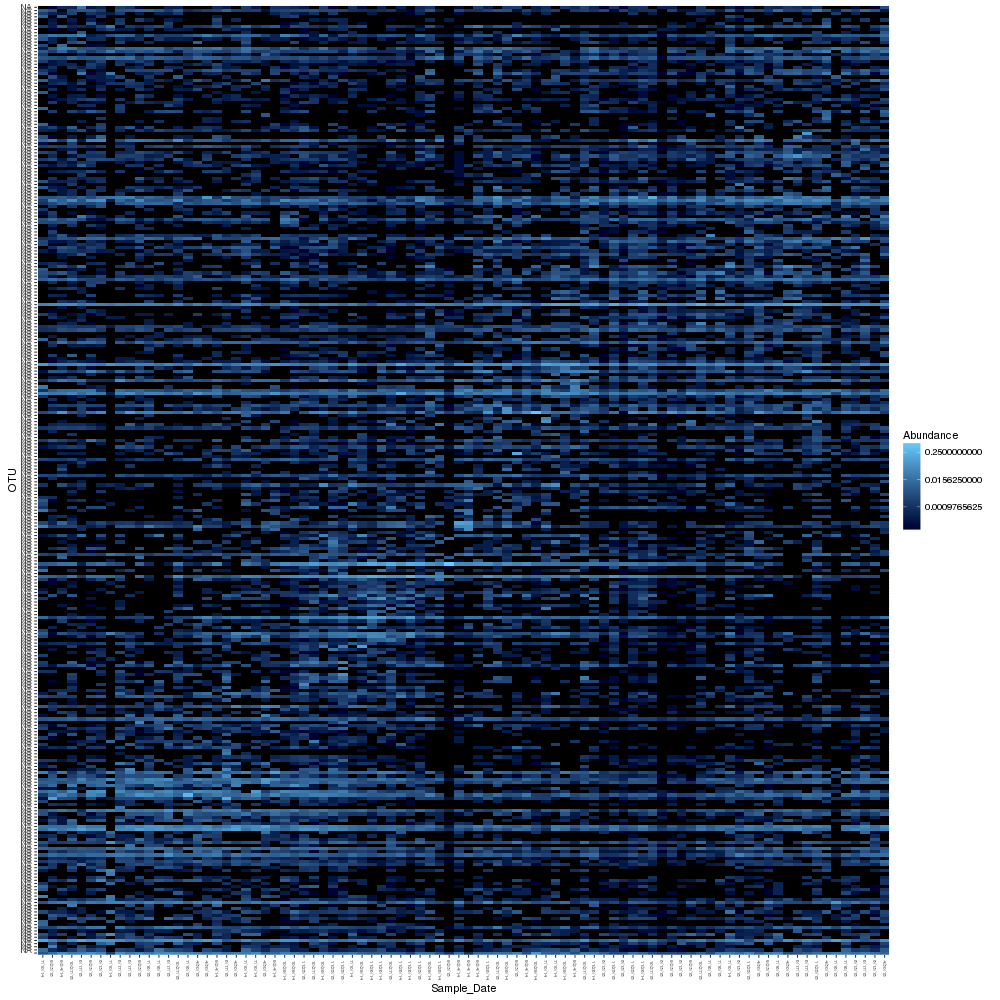

In [27]:
%%R -w 1000 -h 1000
physeq.m = sample_data(physeq.Bulk.core.norm)

gpt = prune_samples(physeq.Bulk.m$Land_Management %in% c('NTH', 'NTR'), physeq.Bulk.core.norm)
gpt <- subset_taxa(gpt, Rank1 =="k__Fungi") 
gpt <- prune_taxa(names(sort(taxa_sums(gpt),TRUE)[1:300]), gpt)
plot_heatmap(gpt, sample.label="Sample_Date")

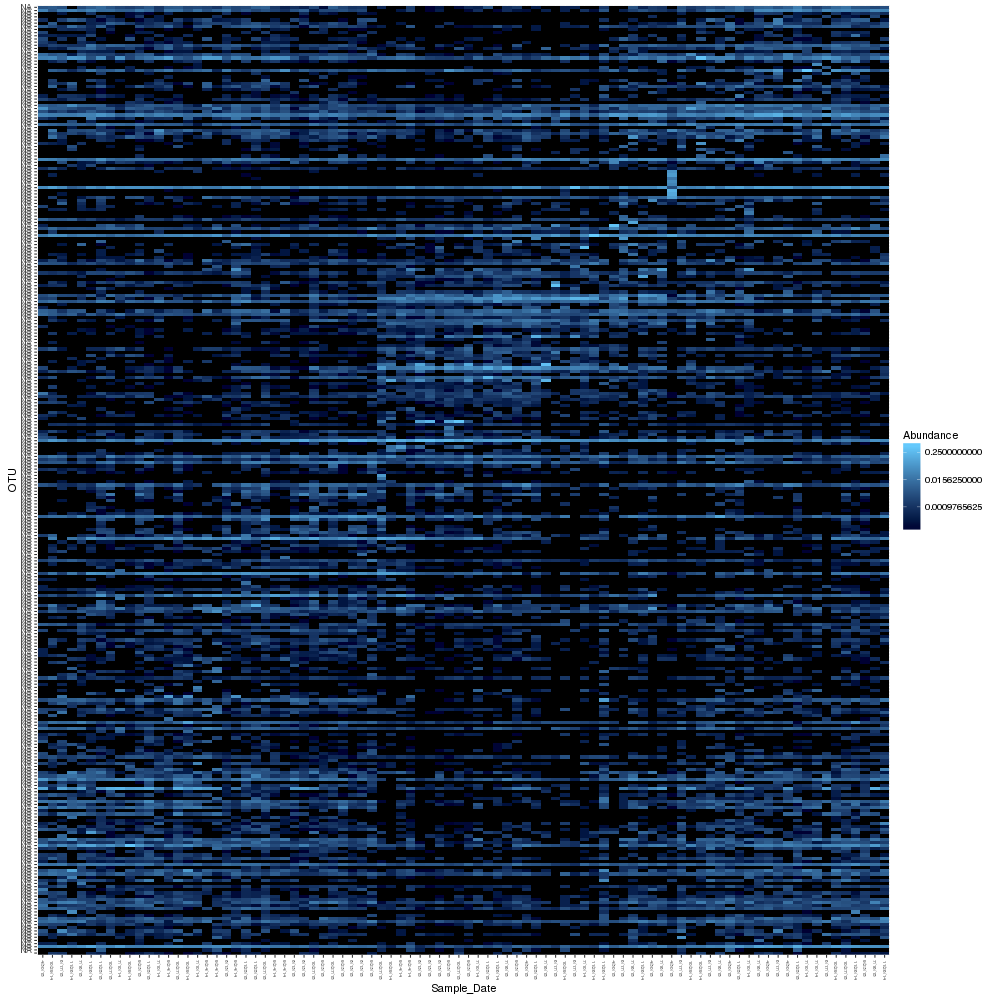

In [28]:
%%R -w 1000 -h 1000
physeq.m = sample_data(physeq.Bulk.core.norm)

gpt = prune_samples(physeq.Bulk.m$Land_Management %in% c('PTH', 'PTR'), physeq.Bulk.core.norm)
gpt <- subset_taxa(gpt, Rank1 =="k__Fungi") 
gpt <- prune_taxa(names(sort(taxa_sums(gpt),TRUE)[1:300]), gpt)
plot_heatmap(gpt, sample.label="Sample_Date")

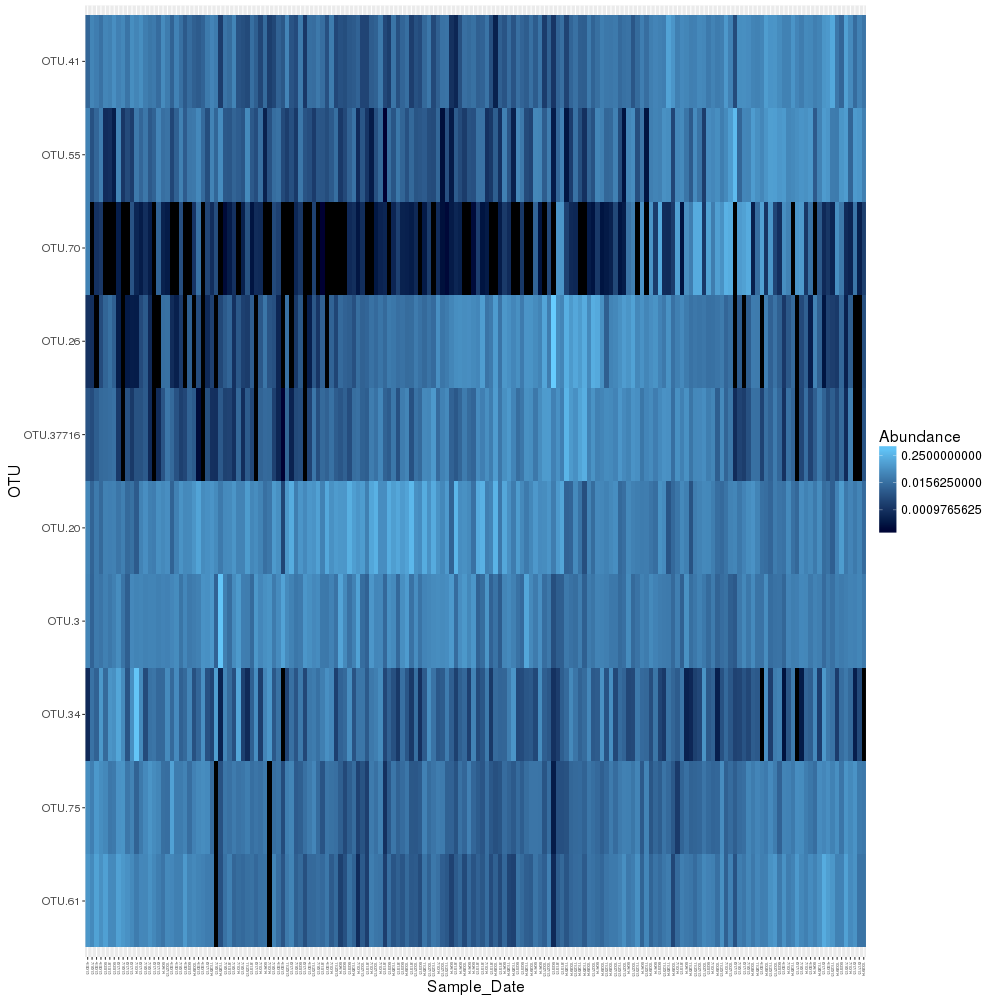

In [29]:
%%R -w 1000 -h 1000
gpt <- subset_taxa(physeq.Bulk.core.norm, Rank1 =="k__Fungi")
gpt <- prune_taxa(names(sort(taxa_sums(gpt),TRUE)[1:10]), gpt)
plot_heatmap(gpt, sample.label="Sample_Date") + 
    theme(
        text = element_text(size=16))

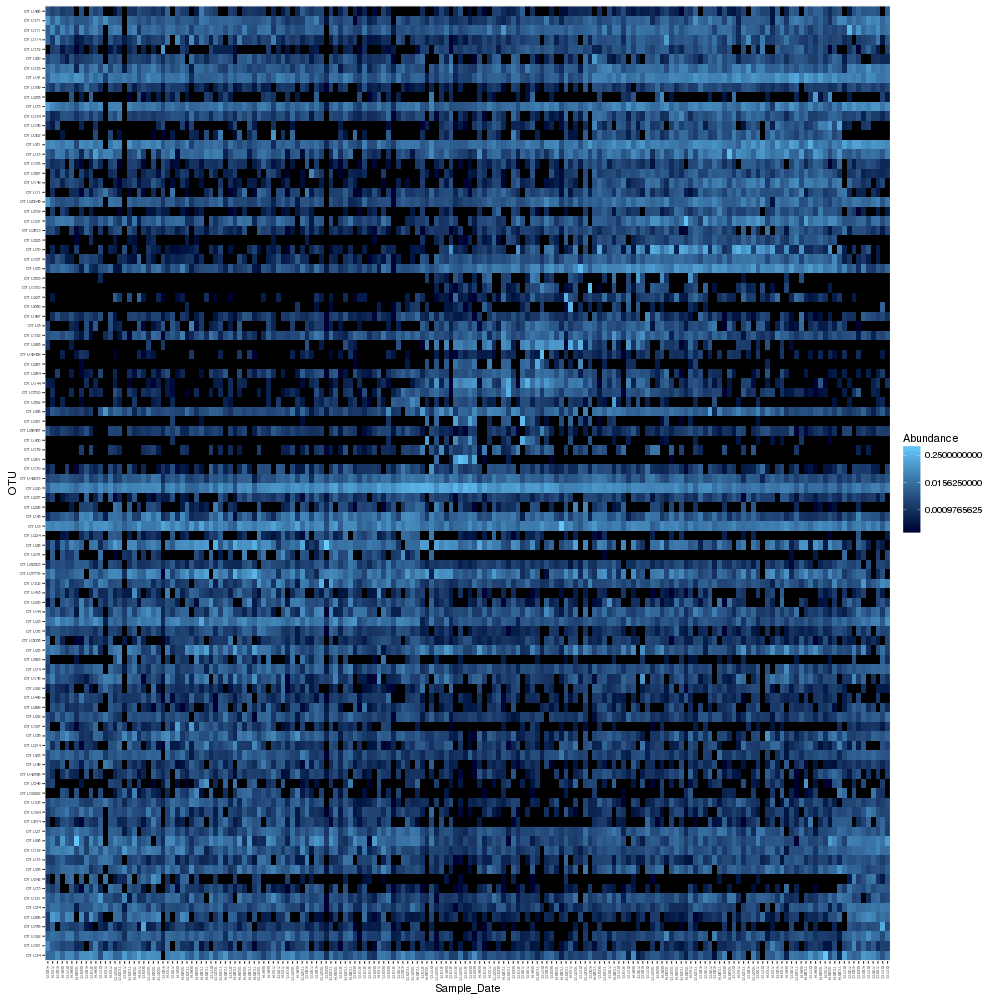

In [30]:
%%R -w 1000 -h 1000
gpt <- subset_taxa(physeq.Bulk.core.norm, Rank1 =="k__Fungi")
gpt <- prune_taxa(names(sort(taxa_sums(gpt),TRUE)[1:100]), gpt)
plot_heatmap(gpt, sample.label="Sample_Date")

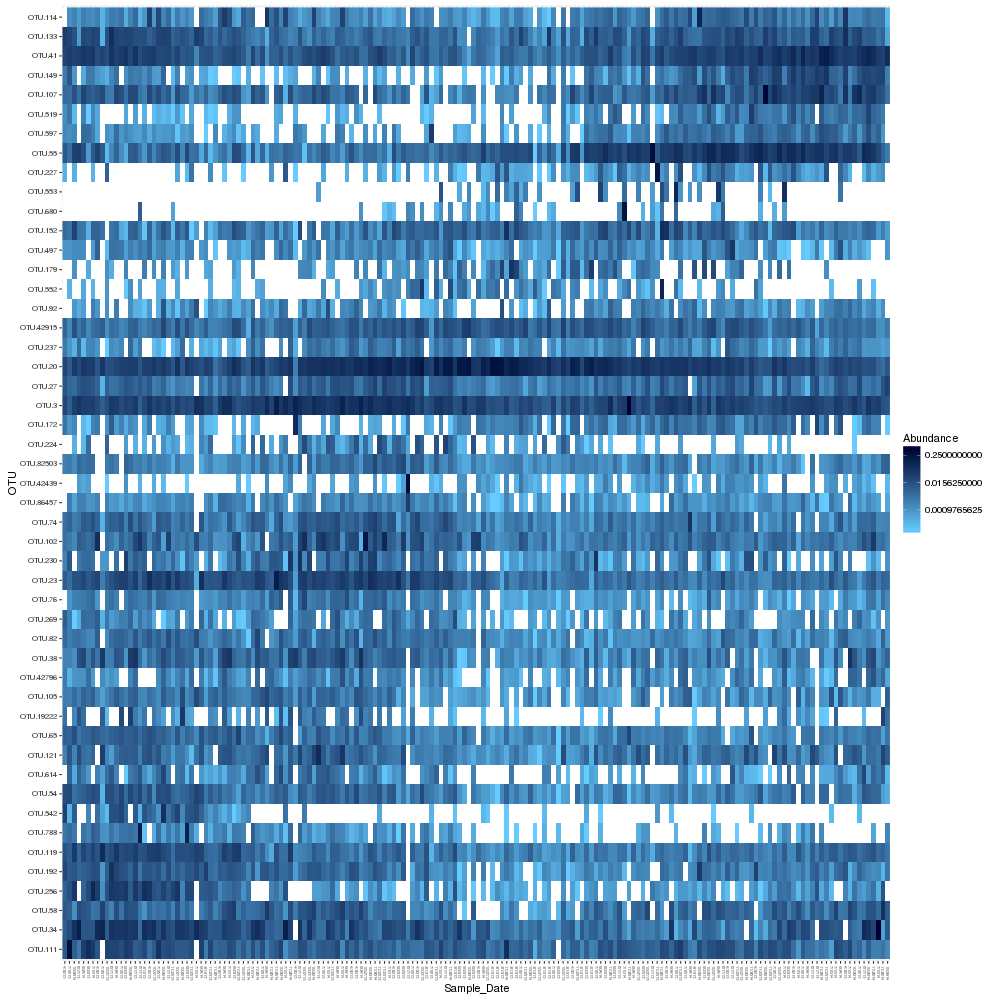

In [31]:
%%R -h 1000 -w 1000
gpac <- subset_taxa(gpt, Rank3=="c__Sordariomycetes")
plot_heatmap(gpac, "NMDS", "bray", "Sample_Date", low="#66CCFF", high="#000033", na.value="white")

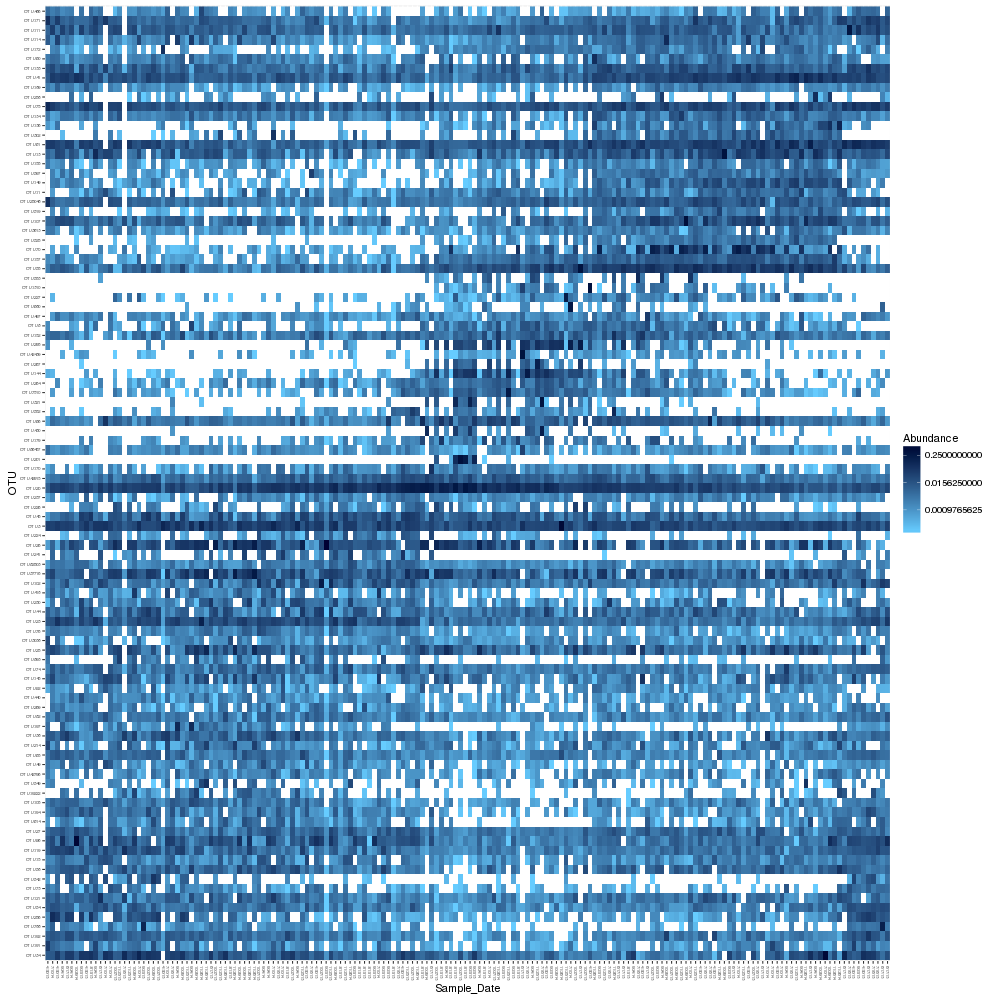

In [32]:
%%R -w 1000 -h 1000
plot_heatmap(gpt, "NMDS", "bray", "Sample_Date", low="#66CCFF", high="#000033", na.value="white")

In [33]:
%%R
test = sample_data(gpt)
levels(test$Sample_Date)

 [1] "7/10/14"  "9/24/14"  "10/29/14" "11/26/14" "4/30/15"  "6/17/15" 
 [7] "7/16/15"  "8/13/15"  "9/23/15"  "10/27/15" "11/25/15"


In [34]:
%%R
physeq.bulk <- subset_taxa(physeq.Bulk.core, Rank1 =="k__Fungi") 
dsn <- transform_sample_counts(physeq.bulk, function(x) x / sum(x) * 100)
dsf = prune_taxa(names(sort(taxa_sums(dsn),TRUE)[1:50]), dsn)
    
sample_data(dsf)$Sample_Date = as.POSIXct(strptime(sample_data(dsf)$Sample_Date, format = "%m/%d/%Y"))


colnames(tax_table(dsf)) <- c(k = "Kingdom", p = "Phylum", c = "Class", 
    o = "Order", f = "Family", g = "Genus", s = "Species")

dsf

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 50 taxa and 176 samples ]
sample_data() Sample Data:       [ 176 samples by 24 sample variables ]
tax_table()   Taxonomy Table:    [ 50 taxa by 7 taxonomic ranks ]


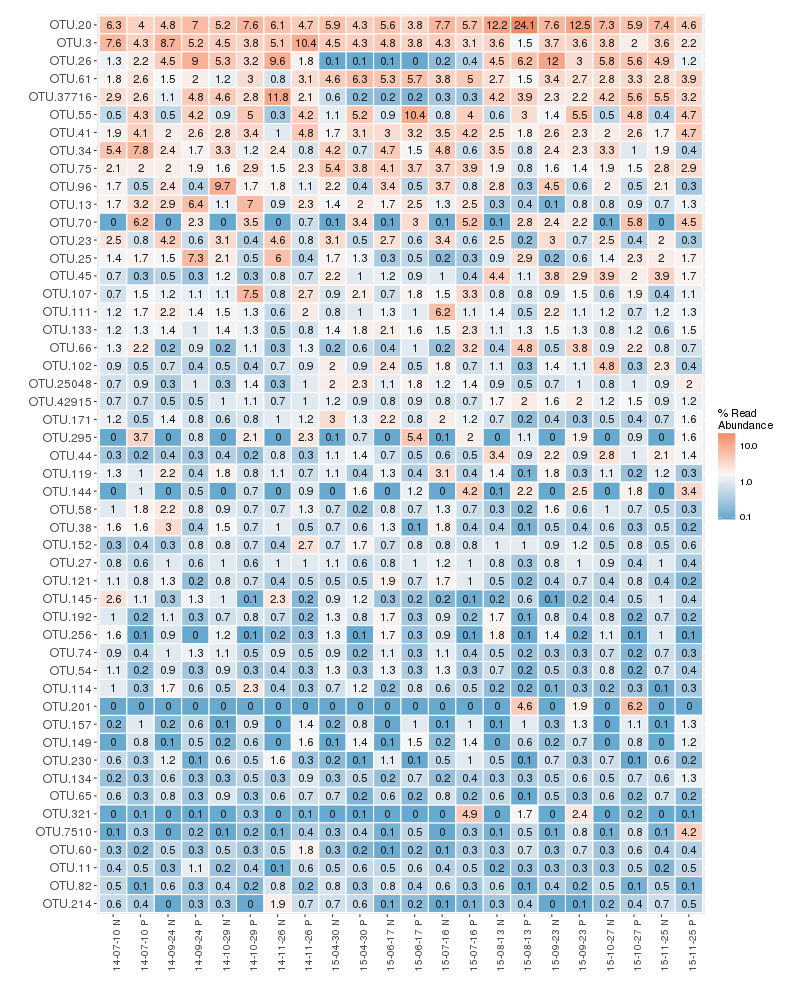

In [35]:
%%R -w 800 -h 1000
amp_heatmap(data = dsf, 
            group = c("Sample_Date", "Till"), 
            tax.aggregate = 'OTU',
            tax.show = 50,
            scale.seq = 100,
            )

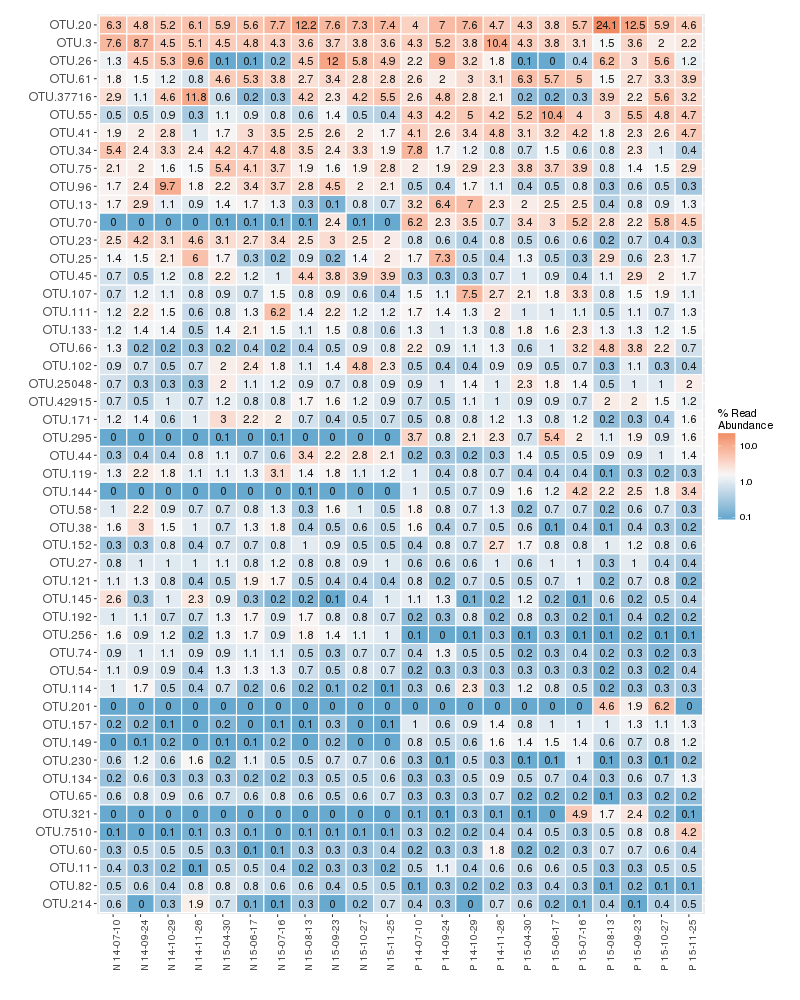

In [36]:
%%R -w 800 -h 1000
amp_heatmap(data = dsf, 
            group = c("Till", "Sample_Date"), 
            tax.aggregate = 'OTU',
            tax.show = 50,
            scale.seq = 100,
            )

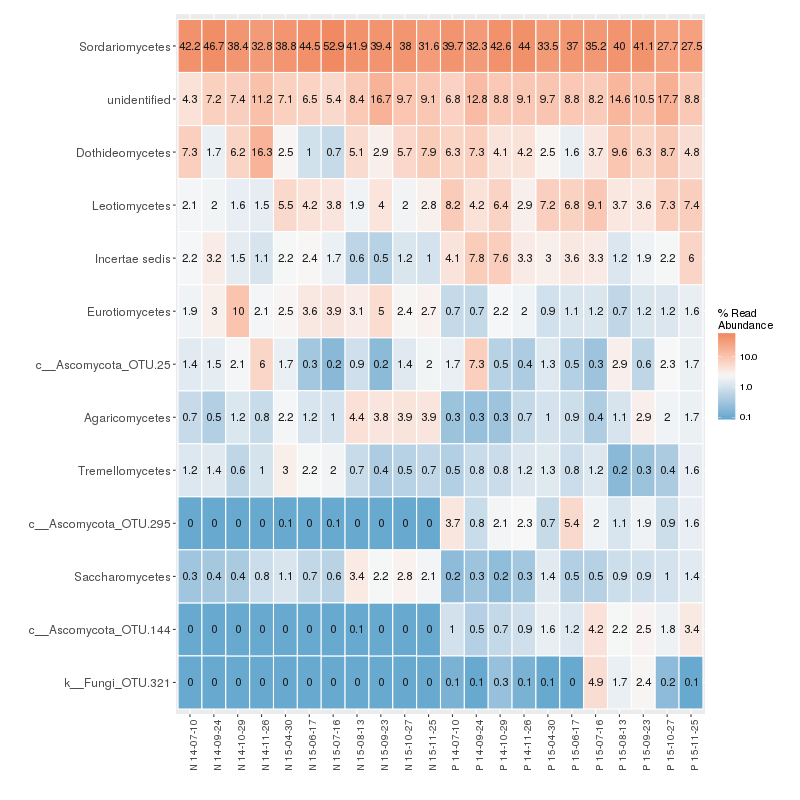

In [37]:
%%R -w 800 -h 800
amp_heatmap(data = dsf, 
            group = c("Till", "Sample_Date"), 
            tax.aggregate = 'Class',
            tax.show = 100,
            scale.seq = 100)

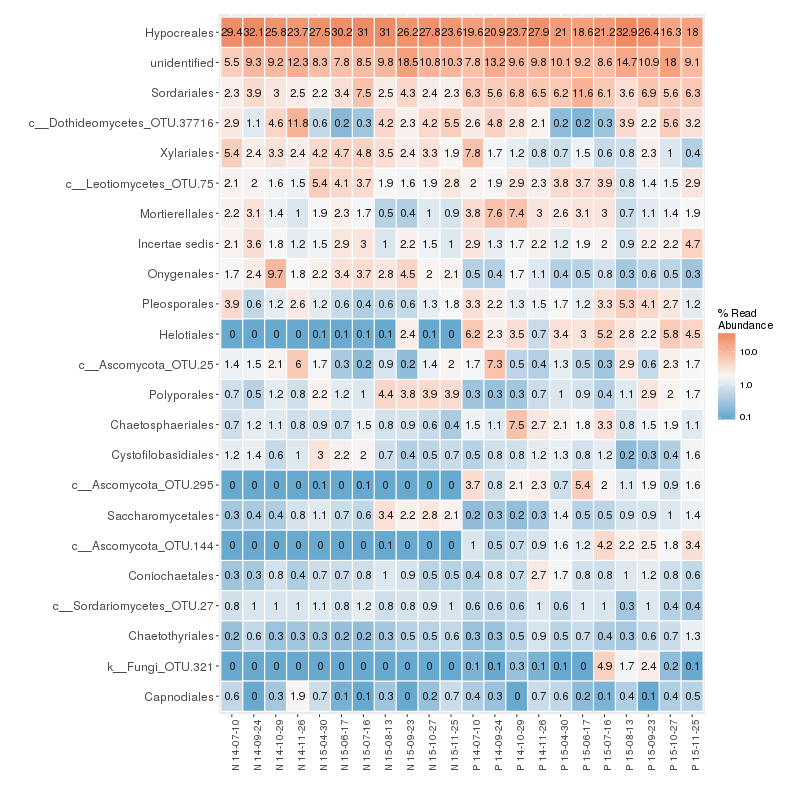

In [38]:
%%R -w 800 -h 800
amp_heatmap(data = dsf, 
            group = c("Till", "Sample_Date"), 
            tax.aggregate = 'Order',
            tax.show = 100,
            scale.seq = 100)

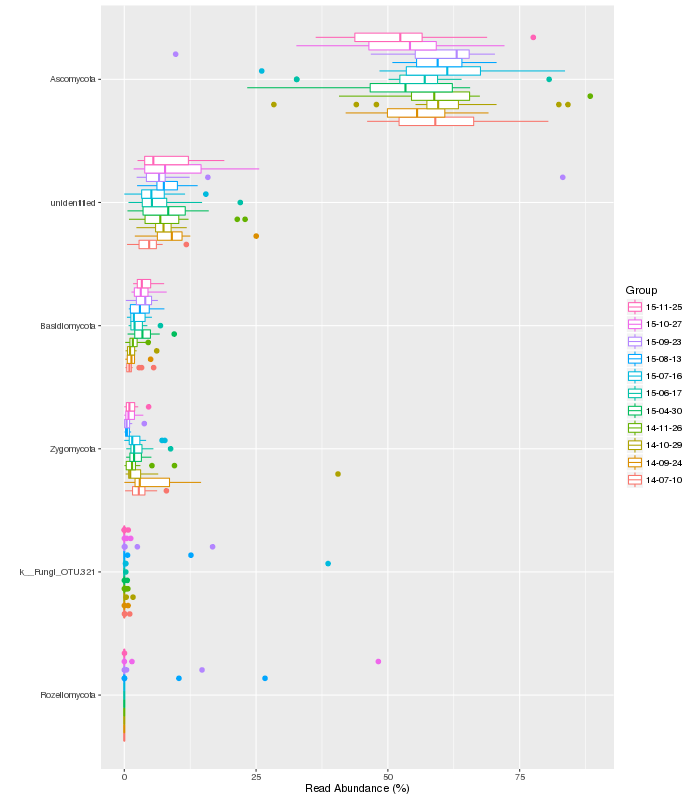

In [39]:
%%R -h 800 -w 700
amp_rabund(data = dsf,
           group = 'Sample_Date',
           tax.aggregate = "Phylum",
          # tax.add = "Phylum",
           scale.seq = 100)

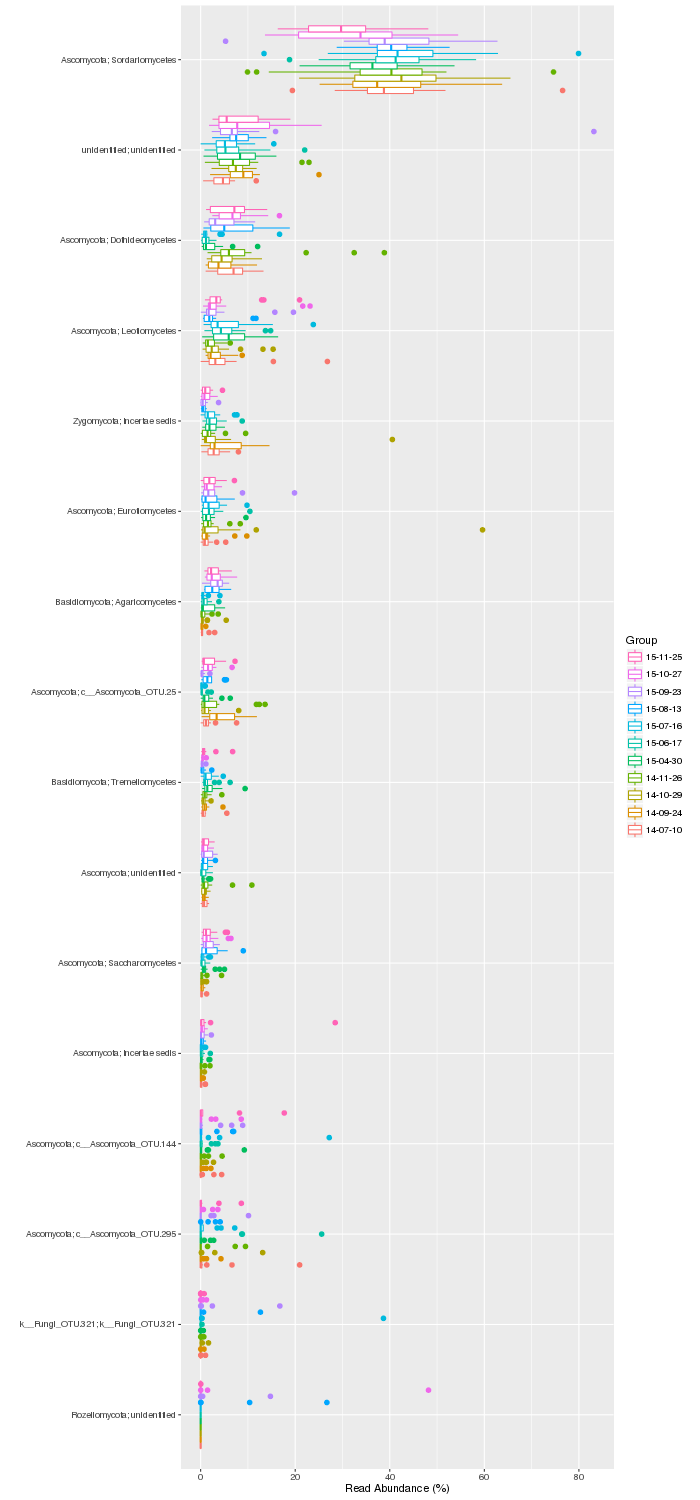

In [40]:
%%R -h 1500 -w 700
amp_rabund(data = dsf,
           group = 'Sample_Date',
           tax.aggregate = "Class",
           tax.add = "Phylum",
           scale.seq = 100)

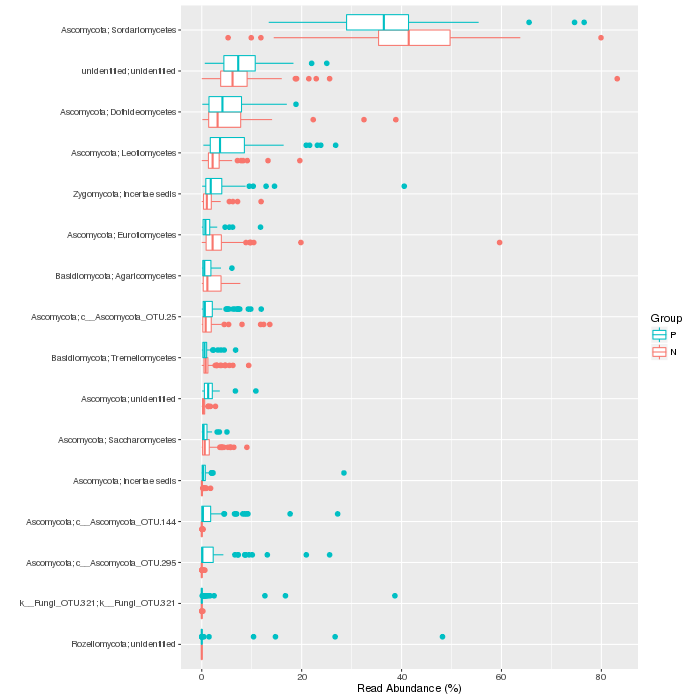

In [41]:
%%R -h 700 -w 700
amp_rabund(data = dsf,
           group = 'Till',
           tax.aggregate = "Class",
           tax.add = "Phylum",
           scale.seq = 100)

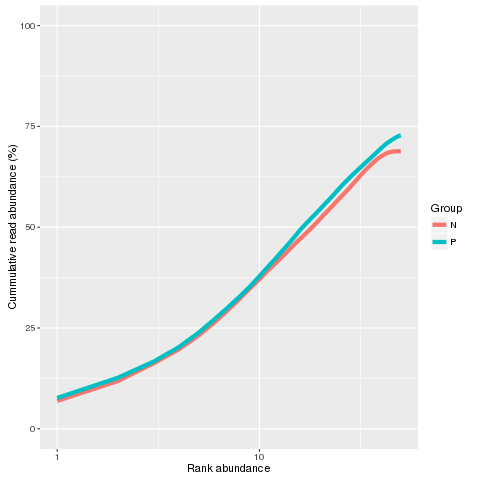

In [42]:
%%R
amp_rabund(data = dsf,
           plot.type = "curve",
           tax.aggregate = "OTU",
           scale.seq = 100,
           group = "Till",
           plot.log = T)

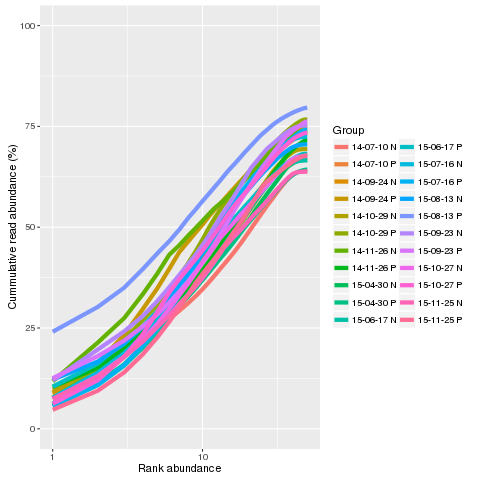

In [43]:
%%R
amp_rabund(data = dsf,
           plot.type = "curve",
           tax.aggregate = "OTU",
           scale.seq = 100,
           group = c("Sample_Date", "Till"),
           plot.log = T) 

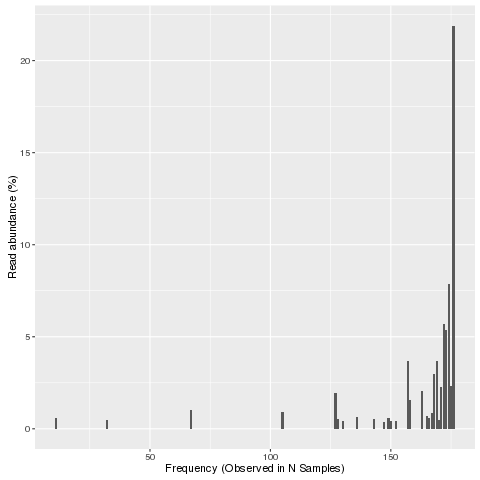

In [44]:
%%R
amp_core(data = dsf, 
         plot.type = "frequency", 
         weight = T,
         scale.seq = 100)

In [45]:
%%R
physeq.bulk <- subset_taxa(physeq.Bulk.core, Rank1 =="k__Fungi") 
dsn <- transform_sample_counts(physeq.bulk, function(x) x / sum(x) * 100)
#dsf = prune_taxa(names(sort(taxa_sums(dsn),TRUE)[1:100]), dsn)
    
sample_data(dsn)$Sample_Date = as.POSIXct(strptime(sample_data(dsn)$Sample_Date, format = "%m/%d/%Y"))


colnames(tax_table(dsn)) <- c(k = "Kingdom", p = "Phylum", c = "Class", 
    o = "Order", f = "Family", g = "Genus", s = "Species")

dsn

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2182 taxa and 176 samples ]
sample_data() Sample Data:       [ 176 samples by 24 sample variables ]
tax_table()   Taxonomy Table:    [ 2182 taxa by 7 taxonomic ranks ]


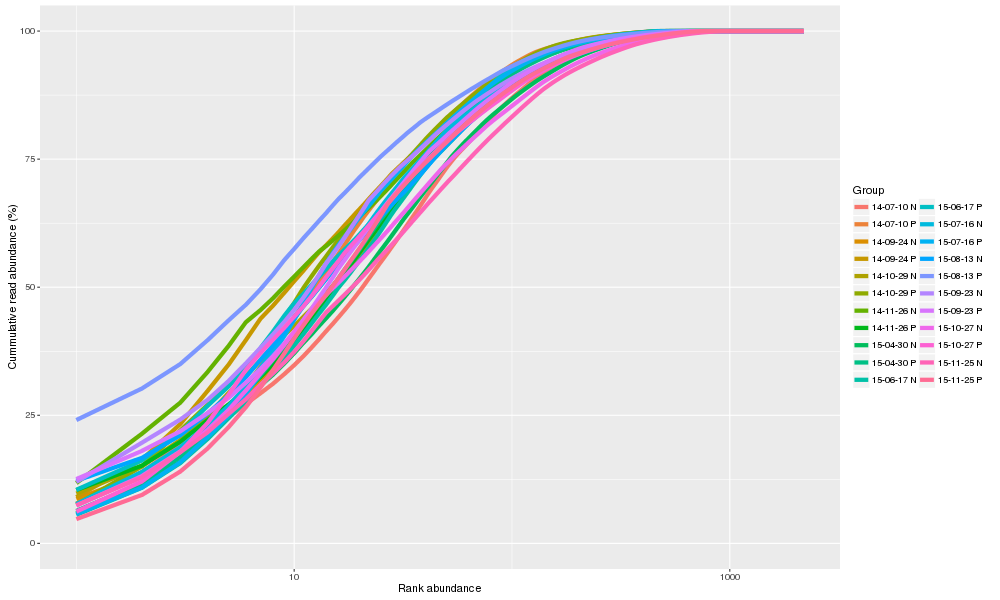

In [46]:
%%R -w 1000 -h 600
amp_rabund(data = dsn,
           plot.type = "curve",
           tax.aggregate = "OTU",
           scale.seq = 100,
           group = c("Sample_Date", "Till"),
           plot.log = T) 

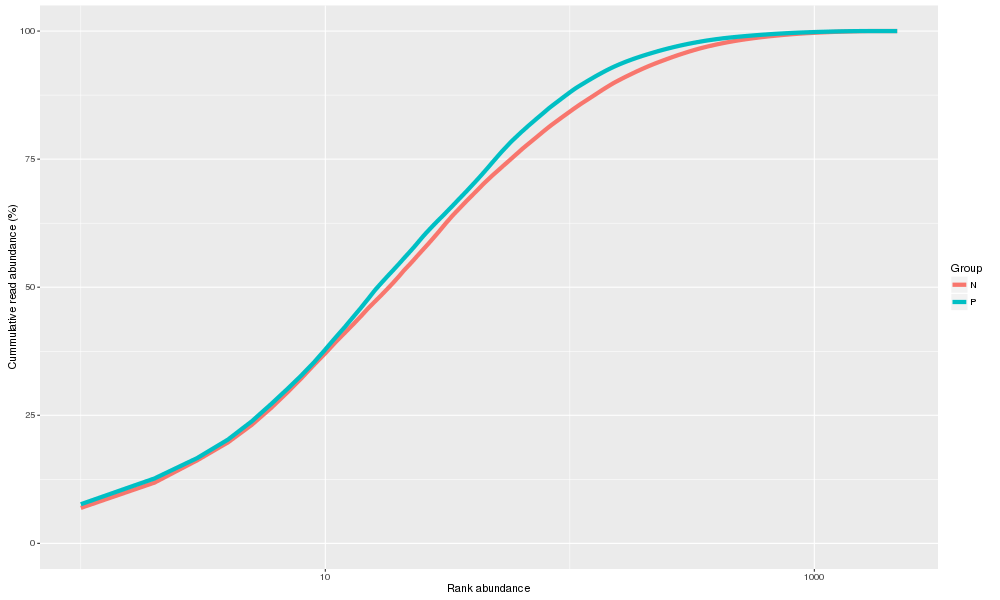

In [47]:
%%R -w 1000 -h 600
amp_rabund(data = dsn,
           plot.type = "curve",
           tax.aggregate = "OTU",
           scale.seq = 100,
           group = "Till",
           plot.log = T)